# Práctico 3 - Procesamiento Digital de Imágenes

In [75]:
import math
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
#Definiendo Matriz de RGB a YIQ
MatrizRGBtoYIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])
#Definiendo Matriz de YIQ a RGB  
MatrizYIQtoRGB=np.array([[1,0.9663,0.6210],
                         [1,-0.2721,-0.6474],
                         [1,-1.1070,1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MatrizRGBtoYIQ)

def yiq2rgb(img):
    return apply_matrix(img, MatrizYIQtoRGB)

def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

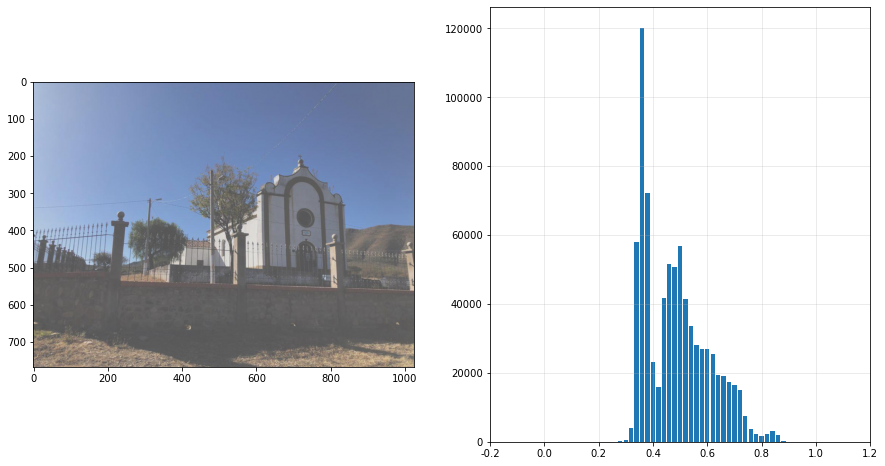

In [77]:
Imagen_RGB = imageio.imread('../PDITARRAGA/SellaIglesia.jpeg')/255
fig, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].imshow(Imagen_RGB, vmin=0, vmax=1)
plot_hist(Imagen_RGB, 50, axes[1])

# 1. Normalizar histograma al rango [0,1]

Definir una función que normalice el histograma de valores de la imagen al rango [0,1]. Si la imagen es RGB, debe normalizar el histograma de luminancias.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.24719607843137253
0.9845921568627449
0.0
1.0


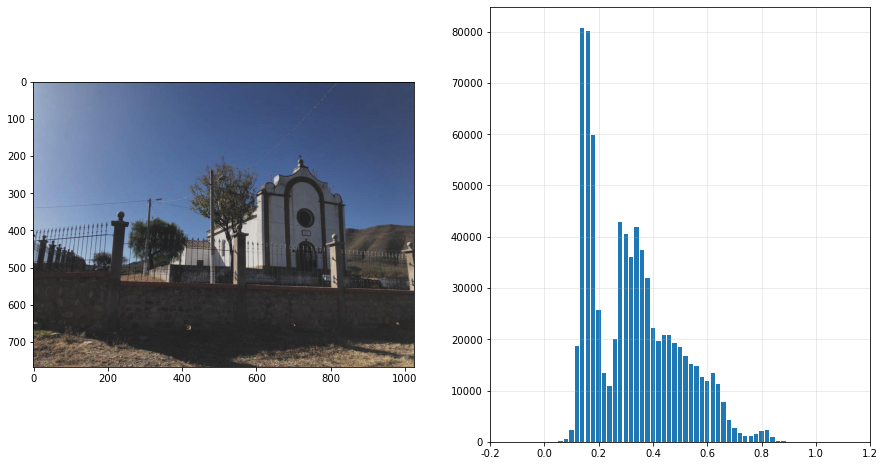

In [78]:
#Convertir al espacio YIQ
YIQ=rgb2yiq(Imagen_RGB)
Ymin=YIQ[:,:,0].min()
Ymax=YIQ[:,:,0].max()
print(Ymin)
print(Ymax)
#
YIQN = YIQ.copy()
YIQN[:,:,0]   =(YIQ[:,:,0]-Ymin)/(Ymax-Ymin) # Normalizacion de cero a 1
Ymin2=YIQN[:,:,0].min()
Ymax2=YIQN[:,:,0].max()
print(Ymin2)
print(Ymax2)
Imagen1 = yiq2rgb(YIQN) #Convierte de YIQ Normalizado a RGB
_, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].imshow(Imagen1, vmin=0, vmax=1)
plot_hist(Imagen1, 50, axes[1])

## 1.1 Normalizar histograma usando percentiles

Definir una función que normalice el histograma de valores de la imagen de modo que el pixel del percentil P valga 0 y el pixel del percentil 100-P valga 1. Los valores entre los percentiles 0 y P valdrán 0 y los valores entre los percentiles 100-P y 100 valdrán 1. Si la imagen es RGB, normalizar el histograma de luminancias.

NOTA: para calcular percentiles usar np.percentile()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.24719607843137253
0.9845921568627449
0.0
1.0


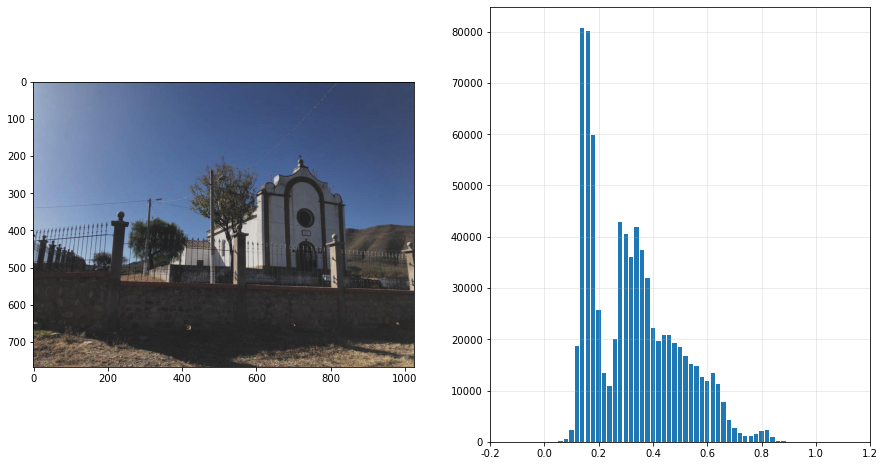

In [79]:
Np0=np.percentile(YIQ[:,:,0],0)
Np100=np.percentile(YIQ[:,:,0],100)
print(Np0)
print(Np100)
YIQNp = YIQ.copy()
YIQNp[:,:,0]   =(YIQ[:,:,0]-Np0)/(Np100-Np0) # Normalizacion de cero a 1
Imagen2 = yiq2rgb(YIQNp) #Convierte de YIQ Normalizado a RGB
Np02=np.percentile(YIQNp[:,:,0],0)
Np1002=np.percentile(YIQNp[:,:,0],100)
print(Np02)
print(Np1002)
_, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].imshow(Imagen2, vmin=0, vmax=1)
plot_hist(Imagen2, 50, axes[1])

## 2. Corrección gamma

1. Definir una función que aplique la corrección gamma a una imagen. Si la imagen es RGB, debe aplicar la corrección sobre la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] (con min y max o con percentiles) y luego aplicar corrección gamma.


Como sugerencia, pasarle como parámetro un valor $\alpha$ de manera que $\gamma$ se calcule como:

$\gamma = 2^{-\alpha}$

De esta manera, cuando $\alpha=1 \rightarrow \gamma=1/2$, y cuando $\alpha=-1 \rightarrow \gamma=2$. Entonces, para $\alpha>0$ la luminosidad aumenta y para $\alpha<0$ disminuye.

In [80]:
#Convertir al espacio YIQ
YIQ2=rgb2yiq(Imagen_RGB)
Ymin2=YIQ2[:,:,0].min()
Ymax2=YIQ2[:,:,0].max()
print(Ymin)
print(Ymax)
#Normalizando
YIQN2 = YIQ2.copy()
YIQN2[:,:,0]   =(YIQ2[:,:,0]-Ymin2)/(Ymax2-Ymin2) # Normalizacion de cero a 1
Ymin2=YIQN2[:,:,0].min()
Ymax2=YIQN2[:,:,0].max()
print(Ymin2)
print(Ymax2)
## Se procede a usar la matriz normalizada con valores maximos y minimos
Filas,Columnas,Canales=YIQN2.shape # obtenemos el tamaño de la imagen original de YIQ
YIQGama = np.zeros((Filas,Columnas,3)) # Genera matriz vacia para Gama=1/2
YIQGama[:,:,1]=YIQN[:,:,1]
YIQGama[:,:,2]=YIQN[:,:,2]
# Calcular valores de Y
for i in range(Filas):
    for j in range(Columnas) :
              YIQGama[i,j,0] = pow(YIQN[i,j,0],1/2) ; #Calcula Y=Y`(2)

0.24719607843137253
0.9845921568627449
0.0
1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imagen con Gama 1/2')

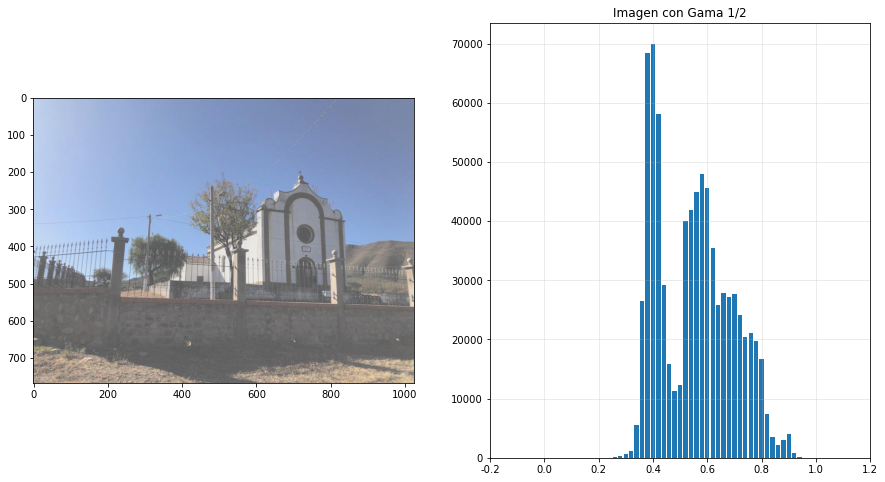

In [81]:
ImagenRGBGama = yiq2rgb(YIQGama) #Convierte de YIQ Gama a RGB
_, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].imshow(ImagenRGBGama, vmin=0, vmax=1)
plot_hist(ImagenRGBGama, 50, axes[1])
axes[1].set_title('Imagen con Gama 1/2')

In [82]:
YIQGama2 = np.zeros((Filas,Columnas,3)) # Genera matriz vacia para Gama=2
YIQGama2[:,:,1]=YIQN[:,:,1]
YIQGama2[:,:,2]=YIQN[:,:,2]
# Calcular valores de Y
for i in range(Filas):
    for j in range(Columnas) :
              YIQGama2[i,j,0] = pow(YIQN[i,j,0],2) ; #Calcula Y=Y`(2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imagen con Gama 2')

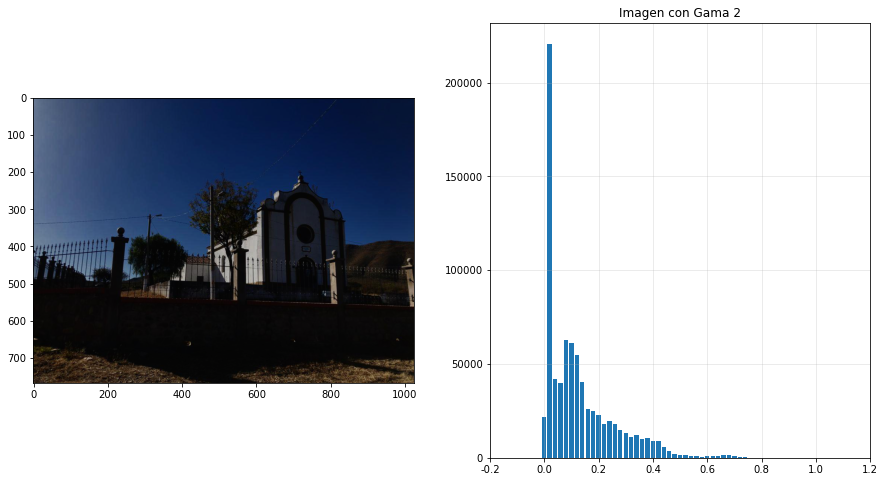

In [83]:
ImagenRGBGama2 = yiq2rgb(YIQGama2) #Convierte de YIQ Gama a RGB
_, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].imshow(ImagenRGBGama2, vmin=0, vmax=1)
plot_hist(ImagenRGBGama2, 50, axes[1])
axes[1].set_title('Imagen con Gama 2')

# 3. Modificación del histograma por una función definida a tramos

1. Definir una función que tome una imagen y dos arreglos $x$ e $y$ que definan una función no-lineal en el rango $0\leq x,y\leq 1$ y aplique la función a la intensidad de los pixeles de la imagen. Si la imagen es RGB debe aplicar la función a la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] y luego aplicar corrección gamma.

Ayuda: La función np.interp() puede facilitarle la tarea

In [84]:
#Convertir al espacio YIQ
YIQ3=rgb2yiq(Imagen_RGB)
Ymin3=YIQ3[:,:,0].min()
Ymax3=YIQ3[:,:,0].max()
print(Ymin3)
print(Ymax3)
#Crear la funcion espacio Y a normalizar
YIQN3 = YIQ3.copy()
YIQN3[:,:,0]   =(YIQ3[:,:,0]-Ymin3)/(Ymax3-Ymin3) # Normalizacion de cero a 1
#Se va definir el tramo entre 0,2 y 0,8
Vmin = 0.10
Vmax = 0.80
#Se utiliza Imagen 1 normalizado por max y min
YIQLtrozos = np.zeros((Filas,Columnas,3)) # Genera matriz vacia para Gama=2                   
YIQLtrozos[:,:,1]=YIQN3[:,:,1]
YIQLtrozos[:,:,2]=YIQN3[:,:,2]
# Calcular valores de Y
for i in range(Filas):
    for j in range(Columnas) :
                if  YIQN3[i,j,0] >= 0 and YIQN3[i,j,0] <= Vmin :
                    YIQLtrozos[i,j,0] = 0  #Si es menor a Ymin_ entonces Y=
                elif YIQN3[i,j,0] >= Vmax and YIQN3[i,j,0] <= 1 :
                    YIQLtrozos[i,j,0] = 1
                else :
                    YIQLtrozos[i,j,0] = YIQN3[i,j,0]

0.24719607843137253
0.9845921568627449


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imagen LINEAL A TROZOS')

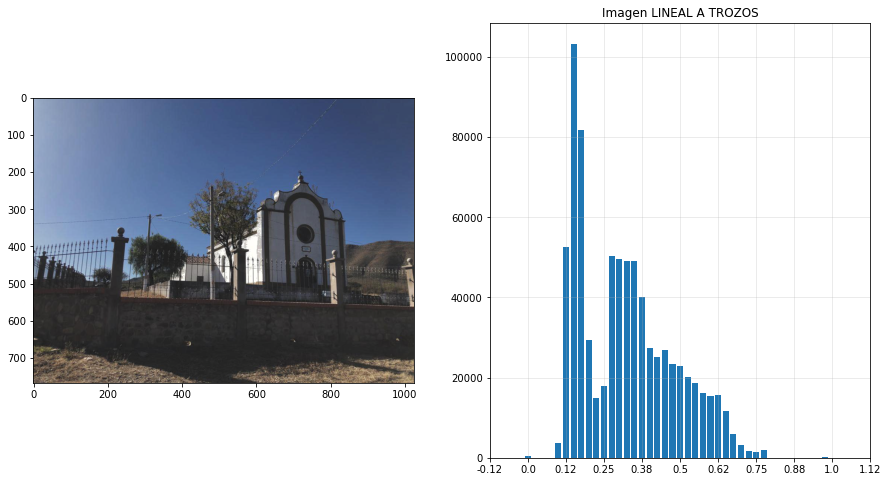

In [85]:
ImagenRGBLT = yiq2rgb(YIQLtrozos) #Convierte de YIQ Gama a RGB
_, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].imshow(ImagenRGBLT, vmin=0, vmax=1)
plot_hist(ImagenRGBLT, 40, axes[1])
axes[1].set_title('Imagen LINEAL A TROZOS')

## 3. Modificación del histograma por una función definida a tramos modo funcion



0.24719607843137253
0.9845921568627449


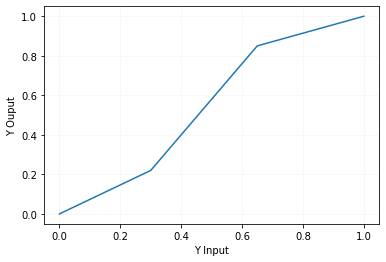

In [86]:
#Convertir al espacio YIQ
YIQ3=rgb2yiq(Imagen_RGB)
Ymin3=YIQ3[:,:,0].min()
Ymax3=YIQ3[:,:,0].max()
print(Ymin3)
print(Ymax3)
#Crear la funcion espacio Y a normalizar
YIQN3 = YIQ3.copy()
YIQN3[:,:,0]   =(YIQ3[:,:,0]-Ymin3)/(Ymax3-Ymin3) # Normalizacion de cero a 1
#Se va definir lo puntos de la funcion
x = [0,0.30,0.65,1]
y = [0,0.22,0.85,1]
plt.plot(x, y)
plt.grid(alpha=0.1)
plt.xlabel('Y Input')
plt.ylabel('Y Ouput')
#Se utiliza Imagen 1 normalizado por max y min
YIQLTF = np.zeros((Filas,Columnas,3)) # Genera matriz vacia para Gama=2                   
YIQLTF[:,:,1]=YIQN3[:,:,1]
YIQLTF[:,:,2]=YIQN3[:,:,2]
#Puntos a evaluar
# Calcular valores de Y
for i in range(Filas):
    for j in range(Columnas) :
                   Val=YIQN3[i,j,0] 
                   Ymodif=np.interp(Val, x, y)
                   YIQLTF[i,j,0] = Ymodif #Si es menor a Ymin_ entonces Y=

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0, 0.5, 'Y Ouput')

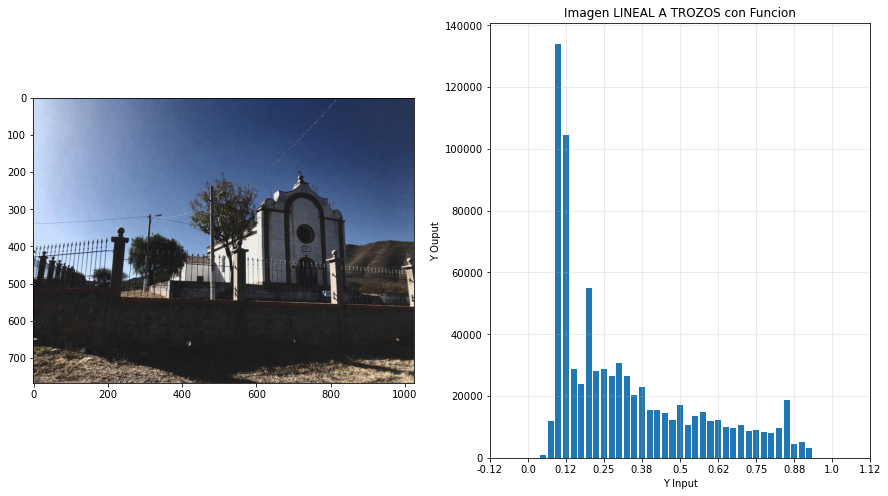

In [87]:
ImagenRGBLFT = yiq2rgb(YIQLTF) #Convierte de YIQ Gama a RGB
_, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].imshow(ImagenRGBLFT, vmin=0, vmax=1)
plot_hist(ImagenRGBLFT, 40, axes[1])
axes[1].set_title('Imagen LINEAL A TROZOS con Funcion')
axes[1].set_xlabel('Y Input')
axes[1].set_ylabel('Y Ouput')

# 4. Uniformalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución uniforme. 
2. Normalizar el histograma al rango [0,1] y uniformalizar su distribución

In [88]:
#Convertir al espacio YIQ
YIQDU=rgb2yiq(Imagen_RGB)
YDUmin=YIQDU[:,:,0].min()
YDUmax=YIQDU[:,:,0].max()
#Crear la funcion espacio Y a normalizar
YIQDUN = YIQDU.copy()
YIQDUN[:,:,0]   =(YIQDUN[:,:,0]-YDUmin)/(YDUmax-YDUmin) # Normalizacion de cero a 1
CanalY=YIQDUN[:,:,0]
Fila,Columna=CanalY.shape
TotalY=Fila*Columna #Total datos
print("Total datos ",TotalY)
xnew=CanalY.copy()
xorden=np.argsort(CanalY,axis=None) #Ordenamiento de menor a mayor
indices=np.unravel_index(xorden,CanalY.shape) #Obtencion indices de ordenamiento
#Puntos para la recta lineal
yl = [0.0,TotalY/2,TotalY]
xl = [0.0,0.5,1]
#Algoritmo distribuicion uniforme lineal
for delta in range(TotalY):
    Filanew=indices[0][delta]
    Colnew =indices[1][delta]
    Ynew=np.interp(delta, yl, xl)
    xnew[Filanew,Colnew]=Ynew
# Calcular valores de Y
for i in range(Filas):
    for j in range(Columnas) :
                   YIQDUN[i,j,0] = xnew[i,j] #Sos Y=

Total datos  786432


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Distribuicion Lineal Uniforme')

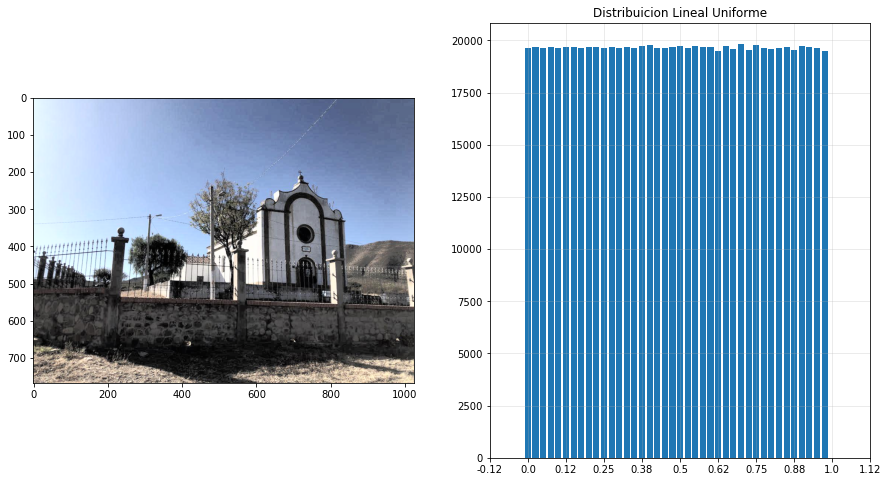

In [89]:
ImagenRGBDU = yiq2rgb(YIQDUN) #Convierte de YIQ Gama a RGB
_, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].imshow(ImagenRGBDU, vmin=0, vmax=1)
plot_hist(ImagenRGBDU, 40, axes[1])
axes[1].set_title('Distribuicion Lineal Uniforme')

# 5. Normalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución normal. 
2. Normalizar el histograma al rango [0,1] y normalizar su distribución.

Total datos  786432


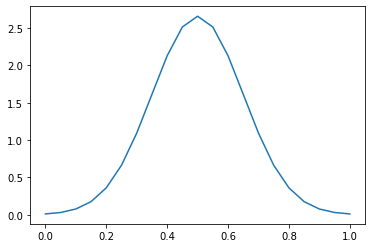

Total valor a repartir 19.99124373923829


In [90]:
#Convertir al espacio YIQ
YIQNorm=rgb2yiq(Imagen_RGB)
YNormmin=YIQNorm[:,:,0].min()
YNormmax=YIQNorm[:,:,0].max()
#Crear la funcion espacio Y normalizada
YIQNormN = YIQNorm.copy()
YIQNormN[:,:,0]   =(YIQNormN[:,:,0]-YNormmin)/(YNormmax-YNormmin) # Normalizacion de cero a 1
CanalY=YIQNormN[:,:,0]
Fila,Columna=CanalY.shape
TotalY=Fila*Columna
print("Total datos ",TotalY)
xnew=CanalY.copy()
xorden=np.argsort(CanalY,axis=None) #Ordenamiento de menor a mayor
indices=np.unravel_index(xorden,CanalY.shape)
from scipy.stats import norm
x5 = np.arange(0,1.05,0.05)  
y5 = norm.pdf(x5,0.5,0.15) 
plt.plot(x5, y5) 
plt.show()
#scipy.stats.norm.pdf(x, loc=0, scale=1)
#scale = Specify standard deviation of the distribution. Must be non-negative. Default is 1.0.
#loc = Media 
sumay5=y5.sum()
print("Total valor a repartir",sumay5) 
VReparto=y5.copy() # Vector que tiene el reparto de cantidades de datos
VReparto[:]=(TotalY/sumay5)*VReparto[:]
for k in range(len(VReparto)):  # Vector que proporciona las cantidades a repartir en forma entera
         aux=round(VReparto[k])
         VReparto[k]=aux
VRep=np.cumsum(VReparto) # Vector acumulado de las reparticiones

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Distribuicion Normalizada')

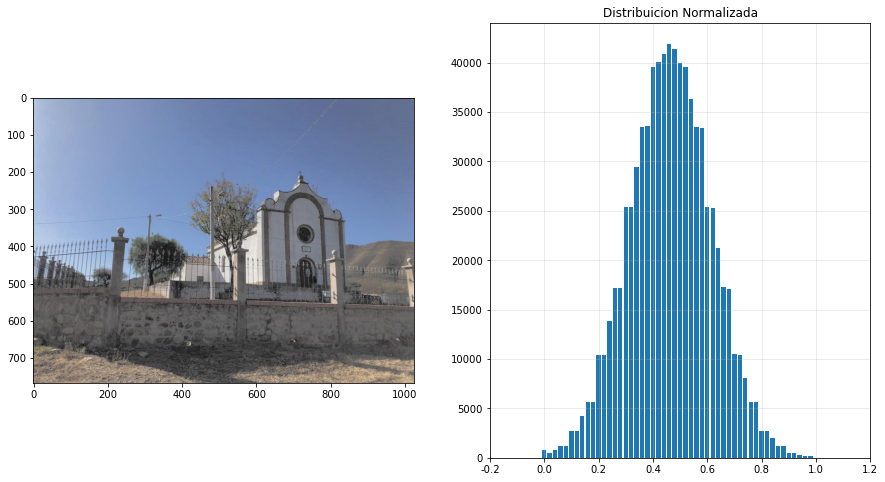

In [91]:
#Algoritmo distribuicion Normalizada
for delta in range(TotalY):
    Filanew=indices[0][delta]
    Colnew =indices[1][delta]
    Ynew=np.interp(delta, VRep, x5)
    xnew[Filanew,Colnew]=Ynew
# Actualiza los valores de Y de acuerdo a reparticion Gausiana
for i in range(Filas):
    for j in range(Columnas) :
                   YIQDUN[i,j,0] = xnew[i,j] #Sos Y=
###
ImagenRGBDU = yiq2rgb(YIQDUN) #Convierte de YIQ Gama a RGB
_, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].imshow(ImagenRGBDU, vmin=0, vmax=1)
plot_hist(ImagenRGBDU, 50, axes[1])
axes[1].set_title('Distribuicion Normalizada')